In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, BaseMessage
from langchain_openai import ChatOpenAI
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import InMemorySaver
from typing import List, TypedDict, Annotated
from dotenv import load_dotenv

In [2]:
load_dotenv()

llm = ChatOpenAI(model="gpt-4.1-nano")

In [3]:
# build state graph
class JokeState(TypedDict):
    topic: str
    joke: str
    explaination: str

In [4]:
def generate_joke(state: JokeState):
    prompt = f"Tell me a joke about {state['topic']}"

    # call llm to get response
    response = llm.invoke([HumanMessage(content=prompt)])

    # add response to state
    return {'joke': response.content}

In [5]:
def explain_joke(state: JokeState):
    prompt = f"Explain the joke: {state['joke']}"

    # call llm to get response
    response = llm.invoke([HumanMessage(content=prompt)])

    # add response to state
    return {'explaination': response.content}

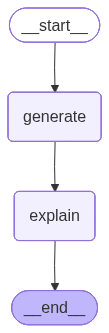

In [6]:
# state graph
graph = StateGraph(JokeState)

# add nodes
graph.add_node("generate", generate_joke)
graph.add_node("explain", explain_joke)

# add edges
graph.add_edge(START, "generate")
graph.add_edge("generate", "explain")
graph.add_edge("explain", END)

# checkpointer - save each state to memory
checkpointer = InMemorySaver()

# graph compilation
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [7]:
thread_id = "1"
config = {"configurable": {"thread_id": thread_id}}

initial_state = {
    "topic": "cars"
}

final_state = workflow.invoke(initial_state, config=config)
print(final_state) # final_state

{'topic': 'cars', 'joke': 'Why did the scarecrow become a car mechanic? Because he was outstanding in his field—and great at fixing "hay-s" (hays) in a car!', 'explaination': 'Sure! The joke plays on a couple of puns and wordplay:\n\n1. **"Outstanding in his field"**: This phrase is a common idiom meaning someone is exceptionally good at their profession. Literally, it also describes a scarecrow standing out in a field of crops, which is what scarecrows do.\n\n2. **Fixing "hay-s" (hays)**: The humor here is in the pun on "hays" (the plural of hay) and "haze." \n   \n   - Hay is what a scarecrow would "fix" in the field—literally stuff made from dried grass or straw.\n   - The phrase "fixing hays" sounds like "fixing \'haze\'"—which might make one think of clearing up fog or confusion, but in the context of a car mechanic, it’s just a silly pun. \n   \nAlternatively, it might be a playful way of imagining the scarecrow as a mechanic who’s good at fixing "hays" in a car (like hay in a wh

In [8]:
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'topic': 'cars', 'joke': 'Why did the scarecrow become a car mechanic? Because he was outstanding in his field—and great at fixing "hay-s" (hays) in a car!', 'explaination': 'Sure! The joke plays on a couple of puns and wordplay:\n\n1. **"Outstanding in his field"**: This phrase is a common idiom meaning someone is exceptionally good at their profession. Literally, it also describes a scarecrow standing out in a field of crops, which is what scarecrows do.\n\n2. **Fixing "hay-s" (hays)**: The humor here is in the pun on "hays" (the plural of hay) and "haze." \n   \n   - Hay is what a scarecrow would "fix" in the field—literally stuff made from dried grass or straw.\n   - The phrase "fixing hays" sounds like "fixing \'haze\'"—which might make one think of clearing up fog or confusion, but in the context of a car mechanic, it’s just a silly pun. \n   \nAlternatively, it might be a playful way of imagining the scarecrow as a mechanic who’s good at fixing "hays" in a

In [9]:
thread_id = "2"
config = {"configurable": {"thread_id": thread_id}}

initial_state = {
    "topic": "pizza"
}

final_state = workflow.invoke(initial_state, config=config)
print(final_state) # final_state

{'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it was topping the charts!', 'explaination': 'Certainly! The joke plays on a pun involving the word "topping." \n\n- **"Topping"** refers to the ingredients placed on top of a pizza, like cheese, pepperoni, vegetables, etc.\n- It also relates to the phrase **"topping the charts,"** which is a common idiom meaning someone or something is performing very well, especially in music or popularity rankings.\n\nSo, the joke humorously suggests that the pizza went to the party because it was "topping the charts," combining the literal meaning (as a pizza has toppings) with the figurative idiom (being very popular or successful). The humor arises from the wordplay connecting the pizza\'s toppings to its success or popularity.'}


In [10]:
list(workflow.get_state_history(config=config))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the party? Because it was topping the charts!', 'explaination': 'Certainly! The joke plays on a pun involving the word "topping." \n\n- **"Topping"** refers to the ingredients placed on top of a pizza, like cheese, pepperoni, vegetables, etc.\n- It also relates to the phrase **"topping the charts,"** which is a common idiom meaning someone or something is performing very well, especially in music or popularity rankings.\n\nSo, the joke humorously suggests that the pizza went to the party because it was "topping the charts," combining the literal meaning (as a pizza has toppings) with the figurative idiom (being very popular or successful). The humor arises from the wordplay connecting the pizza\'s toppings to its success or popularity.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0c2a5c-cc2b-6c4a-8002-08beb5a8f2d8'}}, metadata={'source': 'loop', 'step': 2, 'paren